In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-165-ge382d4c Python-3.8.16 torch-2.0.1 CPU


Setup complete ✅ (8 CPUs, 16.0 GB RAM, 401.1/460.4 GB disk)


## Run below code in terminal or in cell to download the coco data set

!bash data/scripts/get_coco.sh

## For downloading the albumentations library for doing the Image Augumentations 

!pip install -U albumentations

## Loading the data set 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


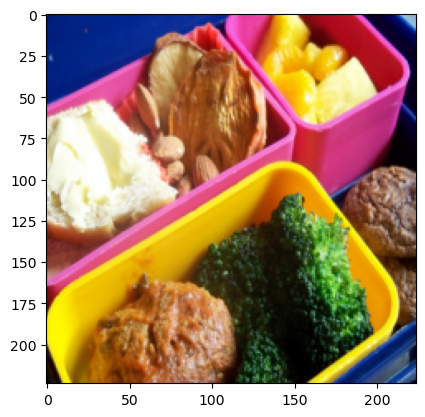

In [16]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

# Define the path to the dataset folder
data_dir = "/Users/nanda/pytorch-test/yolov5/datasets"

# Define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load the dataset using the ImageFolder class and apply the transformations to an image
dataset = ImageFolder(root=data_dir, transform=transform)
image, label = dataset[0]

# Convert the tensor image to a NumPy array and transpose the dimensions
image_np = image.numpy().transpose((1, 2, 0))

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
image_np = image_np * std + mean


# Show the image using Matplotlib
plt.imshow(image_np)
plt.show()


## After running the above code you need to see vegetables then the process has been executed succesfully

### To view the data attributes, including the image size and label, by iterating through a DataLoader, you can use the following code:

In [18]:
import torch.utils.data as data

# Define the DataLoader object
dataloader = data.DataLoader(dataset, batch_size=1, shuffle=False)

# Iterate through the DataLoader and print the image size and label
for images, labels in dataloader:
    # Print the image size and label
    print(f"Image size: {images.shape}, Label: {labels.item()}")


RuntimeError: a Tensor with 100 elements cannot be converted to Scalar

### to see what is type of data file

In [21]:
import os

# Specify the path to the dataset folder
dataset_path = '/Users/nanda/pytorch-test/yolov5/datasets'

# Iterate through the dataset folder and print the file types
for file in os.listdir(dataset_path):
    file_type = os.path.splitext(file)[1]
    print(file_type)


In [31]:
import os

# Specify the path to the dataset folder
dataset_path = '/Users/nanda/pytorch-test/yolov5/datasets/coco/images/train2017'

# Count the number of files in the dataset folder
num_files = len(os.listdir(dataset_path))

# Print the size of the dataset
print(f"The dataset has {num_files} files.")
#print(os.listdir(dataset_path))

The dataset has 118287 files.


## Finding the Dimensions of the Images 

In [38]:
import os
from PIL import Image

# Specify the path to the folder containing the images
folder_path = '/Users/nanda/pytorch-test/yolov5/datasets/coco/images/train2017'

image_count = 0
# Iterate over all files in the folder
for file in os.listdir(folder_path):
    # Check if the file is an image
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, file)

        # Open the image using the PIL library
        image = Image.open(image_path)

        # Get the dimensions of the image
        width, height = image.size

        # Print the dimensions of the image
        print(f"The dimensions of the image {file} are {width}x{height}.")
        image_count += 1
        if image_count >= 100:
            break
        


The dimensions of the image 000000109622.jpg are 640x425.
The dimensions of the image 000000160694.jpg are 640x427.
The dimensions of the image 000000308590.jpg are 427x640.
The dimensions of the image 000000327573.jpg are 488x640.
The dimensions of the image 000000062929.jpg are 640x424.
The dimensions of the image 000000512793.jpg are 640x480.
The dimensions of the image 000000371735.jpg are 500x375.
The dimensions of the image 000000148118.jpg are 640x425.
The dimensions of the image 000000309856.jpg are 640x428.
The dimensions of the image 000000141882.jpg are 500x375.
The dimensions of the image 000000318783.jpg are 500x337.
The dimensions of the image 000000337760.jpg are 500x343.
The dimensions of the image 000000298197.jpg are 481x640.
The dimensions of the image 000000042421.jpg are 427x640.
The dimensions of the image 000000328898.jpg are 640x480.
The dimensions of the image 000000458856.jpg are 640x427.
The dimensions of the image 000000073824.jpg are 640x360.
The dimensions

## How to find how many classes are there

In [53]:
import os

# Specify the path to the folder containing the images
folder_path = '/Users/nanda/pytorch-test/yolov5/datasets/coco/images/train2017'

# Initialize a set to hold the unique class labels
class_labels = set()
class_count =0

# Iterate over all files in the folder
for file in os.listdir(folder_path):
    # Check if the file is an image
    if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
        # Get the class label from the file name
        class_label = file.split('_')[0] # Assumes class label is at the beginning of the file name

        # Add the class label to the set
        class_labels.add(class_label)
        

# Print the number of classes in the dataset
print(f"There are {len(class_labels)}\n")


There are 118287

